# LSTM_Model.ipynb
# ----------------------------------------
#### This notebook builds, trains, and evaluates an LSTM deep learning model
#### for sequence prediction. It is used to learn complex sales trends.
# ----------------------------------------

In [1]:
# Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [11]:
# Load data
train_df = pd.read_csv("R:/Projects/1_Data_Science & ML_Projects/04_Sales and Demand Forecasting for Retail Chains or Predictive Sales/02_Data/2_Processed_dataset/train_data.csv", parse_dates=["Date"])
test_df = pd.read_csv("R:/Projects/1_Data_Science & ML_Projects/04_Sales and Demand Forecasting for Retail Chains or Predictive Sales/02_Data/2_Processed_dataset/test_data.csv", parse_dates=["Date"])

In [13]:
# Filter for one store
store_id = 1
train_store = train_df[train_df["Store"] == store_id].sort_values("Date")
test_store = test_df[test_df["Store"] == store_id].sort_values("Date")

In [15]:
# Prepare data
def create_dataset(series, n_steps=10):
    X, y = [], []
    for i in range(len(series) - n_steps):
        X.append(series[i:i+n_steps])
        y.append(series[i+n_steps])
    return np.array(X), np.array(y)

n_steps = 10
train_series = train_store["Weekly_Sales"].values
X_train, y_train = create_dataset(train_series, n_steps)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

In [17]:
# Build model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=20, verbose=1)

C:\Users\ratho\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 2112808943616.0000
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2108651601920.0000
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1956914921472.0000
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1934892204032.0000
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1931113791488.0000
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1933682278400.0000
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1857658421248.0000
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1784431247360.0000
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1588828438528.0000
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1531564130304.0000
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1413703270400.0000
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1369677758464.0000
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 1388765904896.0000
Epoch 14

In [21]:
# Prepare test input
test_series = np.concatenate([train_series[-n_steps:], test_store["Weekly_Sales"].values[:-1]])
X_test = []
for i in range(len(test_store)):
    X_test.append(test_series[i:i+n_steps])
X_test = np.array(X_test).reshape((len(test_store), n_steps, 1))

In [23]:
# Predict
preds = model.predict(X_test).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step


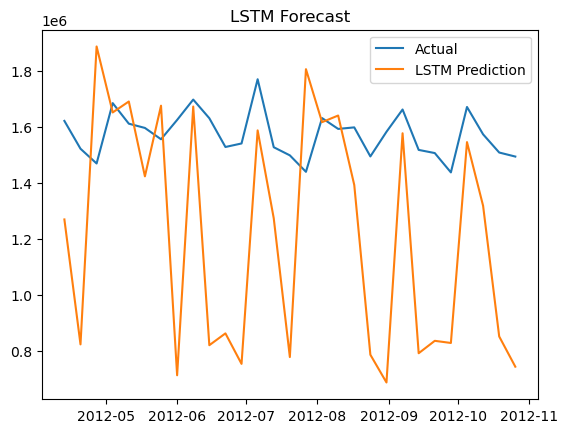

In [25]:
# Plot
plt.plot(test_store["Date"], test_store["Weekly_Sales"], label="Actual")
plt.plot(test_store["Date"], preds, label="LSTM Prediction")
plt.title("LSTM Forecast")
plt.legend()
plt.show()

In [27]:
# RMSE
rmse = mean_squared_error(test_store["Weekly_Sales"], preds, squared=False)
print("LSTM RMSE:", round(rmse, 2))

LSTM RMSE: 522737.91


C:\Users\ratho\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
